In [1]:
import pandas as pd
df = pd.read_csv('철강_제조데이터/steel_data.csv')
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'
import seaborn as sns
import numpy as np

In [2]:
def convert(SCALE):
    if SCALE == "불량":
        return 1
    else:
        return 0
df['SCALE_no'] = df['SCALE'].apply(lambda x: convert(x))

In [3]:
#작업그룹에 따른 양품/불량생성평균
df.groupby(['WORK_GR'],as_index = False)[['SCALE_no']].agg(["mean","count",sum])

SCALE_no          
             mean count sum
WORK_GR                    
1조       0.354497   189  67
2조       0.272727   165  45
3조       0.313953   172  54
4조       0.335052   194  65

[Text(0.5, 1.0, 'HSB 적용 여부에따른 제품의 품질')]

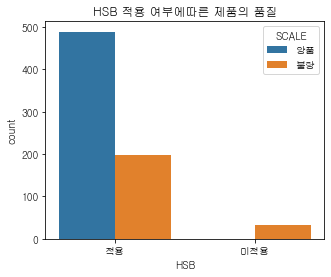

In [4]:
plt.figure(figsize=(5, 4))
sns.countplot(data = df, x='HSB', hue = 'SCALE').set(title = 'HSB 적용 여부에따른 제품의 품질')
# HSB를 적용하지않은 제품은 모두 불량이다. 

In [5]:
df.head(1)

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SCALE_no
0,PB562774,2008-08-01 00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,116,1133,59,282,1133,934,적용,8,2조,0


In [6]:
df['ROLLING_DATE'] = pd.to_datetime(df['ROLLING_DATE'])

In [7]:
df['rolling_hour'] = df['ROLLING_DATE'].dt.hour
df['rolling_hour']
# ROLLING_DATE 를 시간만 추출

0       0
1       0
2       0
3       0
4       0
       ..
715    13
716    13
717    14
718    13
719    14
Name: rolling_hour, Length: 720, dtype: int64

In [8]:
df.groupby("SCALE")['rolling_hour'].sum()
scale_hour = pd.pivot_table(data = df, index = 'rolling_hour', columns = 'SCALE' , values = 'PLATE_NO', aggfunc = 'count').fillna(0)
scale_hour
# 각 시간별 양품,불량 갯수

SCALE,불량,양품
rolling_hour,,
0,3.0,32.0
1,0.0,20.0
2,2.0,29.0
3,2.0,29.0
4,2.0,9.0
5,1.0,22.0
6,5.0,41.0
7,40.0,9.0
8,26.0,20.0


[Text(0.5, 1.0, '제조시간 별 양품/불량 갯수')]

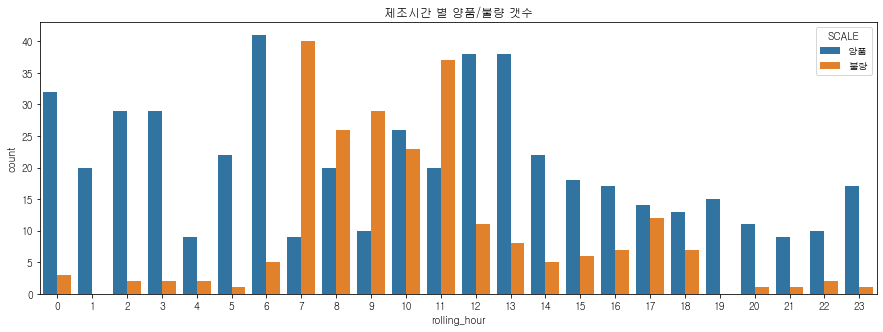

In [9]:
plt.figure(figsize=(15, 5))
sns.countplot(data = df, x='rolling_hour', hue = 'SCALE').set(title = '제조시간 별 양품/불량 갯수')

In [10]:
df_scale_hour = df.groupby(['rolling_hour'], as_index = False)[['SCALE_no']].agg("mean")
df_scale_hour
# 각시간별 불량률을 계산(* 100)

,rolling_hour,SCALE_no
0,0,0.085714
1,1,0.000000
2,2,0.064516
3,3,0.064516
4,4,0.181818
5,5,0.043478
6,6,0.108696
7,7,0.816327
8,8,0.565217
9,9,0.743590


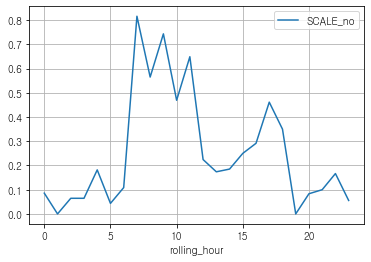

In [11]:
df_scale_hour.plot.line(x='rolling_hour', y='SCALE_no', rot=0).grid(True)

In [12]:
def slot(x):
    if 0<=x<=5: 
        return "새벽"
    elif 6<=x<=11:
        return "오전"
    elif 12<=x<=17:
        return "오후"
    else :
        return "저녁"
df['rolling_slot'] = df['rolling_hour'].apply(slot)
df['rolling_slot']
# ROLLING_DATE를 시간만 추출해 시간대로 분류 0~5시를 새벽 6~11시를 오전 12~17시를 오후 18~23시를 저녁으로 지정

0      새벽
1      새벽
2      새벽
3      새벽
4      새벽
       ..
715    오후
716    오후
717    오후
718    오후
719    오후
Name: rolling_slot, Length: 720, dtype: object

In [13]:
df_rolling_slot = df.groupby(['rolling_slot'], as_index = False)[['SCALE_no']].agg("mean")
df_rolling_slot
# 시간대별로 불량률을 계산

,rolling_slot,SCALE_no
0,새벽,0.066225
1,오전,0.559441
2,오후,0.250000
3,저녁,0.137931


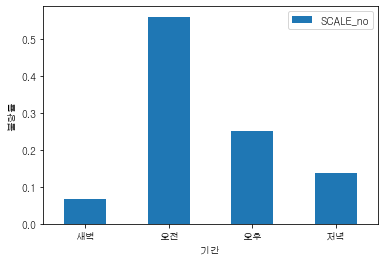

In [14]:
df_rolling_slot.plot.bar(x='rolling_slot', y='SCALE_no', rot=0)
plt.xlabel("기간")
plt.ylabel("불량률")
plt.show()

In [15]:
# 각 종류에 따른 제조 갯수와 총 비율
df_count = df.groupby('STEEL_KIND').agg(count=('SCALE_no','count'))
df_count['비율'] = round(df_count['count'] / 720 * 100, 1)
df_count

,count,비율
STEEL_KIND,,
C0,503,69.9
C1,1,0.1
C3,7,1.0
T0,16,2.2
T1,18,2.5
T3,2,0.3
T5,43,6.0
T7,35,4.9
T8,95,13.2


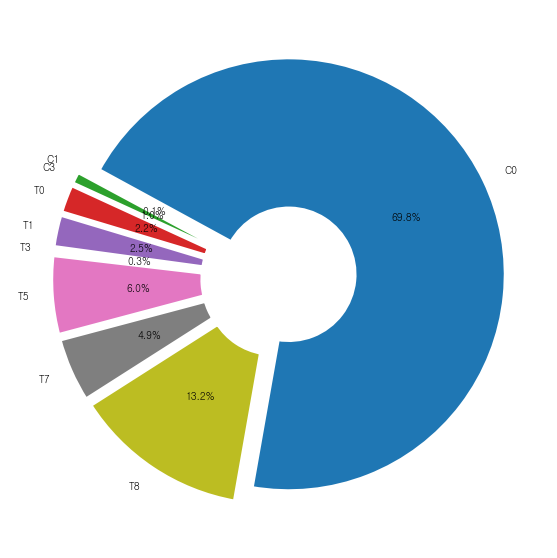

In [16]:
# 가장 많이 생산하는 종류는 'C0','T8' 이다. -> 파이차트 표현해보자
# 종류별 결함을 차지하는 비율 시각화
plt.rcParams['figure.figsize'] = [12,10]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df_count['비율'], labels=['C0','C1','C3','T0','T1','T3','T5','T7','T8'], autopct='%.1f%%', startangle=260, explode=explode, wedgeprops=wedgeprops)
plt.show()

In [17]:
df_no = df.groupby(['STEEL_KIND'],as_index = False)[['SCALE_no']].agg(불량품 = ('SCALE_no',sum))
df_no["불량률"] = round(df_no["불량품"] / 231 * 100, 2)
df_no

,STEEL_KIND,불량품,불량률
0,C0,212,91.77
1,C1,1,0.43
2,C3,1,0.43
3,T0,2,0.87
4,T1,2,0.87
5,T3,0,0.00
6,T5,2,0.87
7,T7,6,2.60
8,T8,5,2.16


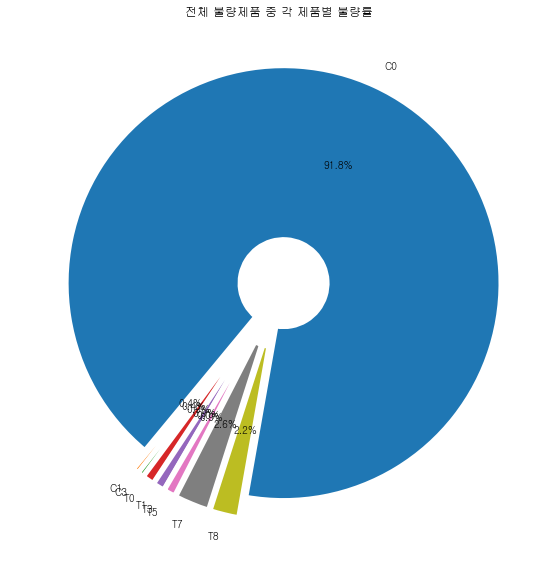

In [18]:
plt.rcParams['figure.figsize'] = [14,10]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df_no["불량률"], labels=['C0','C1','C3','T0','T1','T3','T5','T7','T8'], autopct='%.1f%%', startangle=260, explode=explode, wedgeprops=wedgeprops)
plt.title("전체 불량제품 중 각 제품별 불량률")
plt.show()

In [19]:
df1 = df[df['STEEL_KIND']=='C0']
df1['STEEL_KIND'].unique()

array(['C0'], dtype=object)

In [20]:
# 'C0'와 FUR_NO, FUR_NO_ROW
df_test = df1.groupby(['STEEL_KIND','FUR_NO','FUR_NO_ROW'], as_index=False).agg(count=('PLATE_NO','count'))
df_test

# 1,2,3호기와 1,2라인 모두가 대체로 비슷하게 공정한다. -> FUR_NO, FUR_NO_ROW가 불량품을 배출하는데에 큰 의미는 없다.

,STEEL_KIND,FUR_NO,FUR_NO_ROW,count
0,C0,1호기,1,83
1,C0,1호기,2,84
2,C0,2호기,1,85
3,C0,2호기,2,82
4,C0,3호기,1,85
5,C0,3호기,2,84


In [21]:
df1.groupby('rolling_slot',as_index = False).agg(['count',sum])[['SCALE_no']]

C:\Users\lks40\AppData\Local\Temp\ipykernel_25940\3708199741.py:1: FutureWarning: ['ROLLING_DATE'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df1.groupby('rolling_slot',as_index = False).agg(['count',sum])[['SCALE_no']]


SCALE_no     
                count  sum
rolling_slot              
새벽                 20    0
오전                281  158
오후                193   49
저녁                  9    5

In [22]:
df1.groupby('HSB',as_index = False).agg(['count',sum])[['SCALE_no']]

C:\Users\lks40\AppData\Local\Temp\ipykernel_25940\2664864285.py:1: FutureWarning: ['ROLLING_DATE'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df1.groupby('HSB',as_index = False).agg(['count',sum])[['SCALE_no']]


SCALE_no     
       count  sum
HSB              
미적용       22   22
적용       481  190

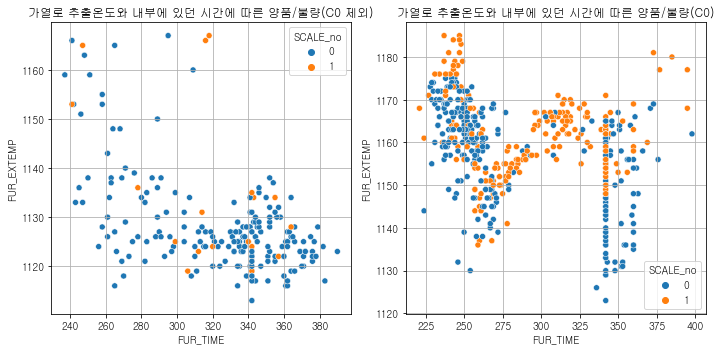

In [23]:
df1 = df[df['STEEL_KIND'] == 'C0']
df2 = df[df['STEEL_KIND'] != 'C0']

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].grid(True)
axes[1].grid(True)

sns.scatterplot(data = df2, x = 'FUR_TIME', y = 'FUR_EXTEMP', hue = 'SCALE_no', ax = axes[0]).set(
title = '가열로 추출온도와 내부에 있던 시간에 따른 양품/불량(C0 제외)')

sns.scatterplot(data = df1, x = 'FUR_TIME', y = 'FUR_EXTEMP', hue = 'SCALE_no', ax = axes[1]).set(
title = '가열로 추출온도와 내부에 있던 시간에 따른 양품/불량(C0)')

fig.tight_layout()

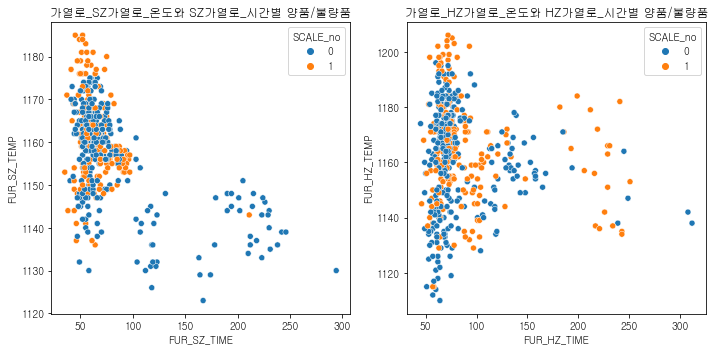

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))


#가열로_SZ가열로_온도와 SZ가열로_시간별 양품/불량품 생산을 비교해보았다.
sns.scatterplot(data = df1, x = 'FUR_SZ_TIME', y = 'FUR_SZ_TEMP', hue = 'SCALE_no',ax = axes[0]).set(
    title = '가열로_SZ가열로_온도와 SZ가열로_시간별 양품/불량품')

#가열로_HZ가열로_온도와 HZ가열로_시간별 양품/불량품 생산을 비교해보았다.
sns.scatterplot(data = df1, x = 'FUR_HZ_TIME', y = 'FUR_HZ_TEMP', hue = 'SCALE_no',ax = axes[1]).set(
    title = '가열로_HZ가열로_온도와 HZ가열로_시간별 양품/불량품')


fig.tight_layout()
# 그래프에 선추가해주기

[Text(0.5, 1.0, '롤링_온도와 제작일자별 양품/불량품')]

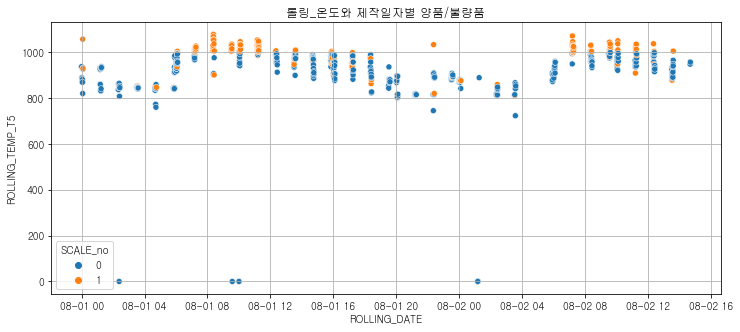

In [25]:
fig, axes = plt.subplots(1,1, figsize=(12,5))

axes.grid(True)

sns.scatterplot(data = df, x = 'ROLLING_DATE', y = 'ROLLING_TEMP_T5', hue = 'SCALE_no').set(
    title = '롤링_온도와 제작일자별 양품/불량품')

[Text(0.5, 1.0, '롤링_온도와 제작일자별 양품/불량품')]

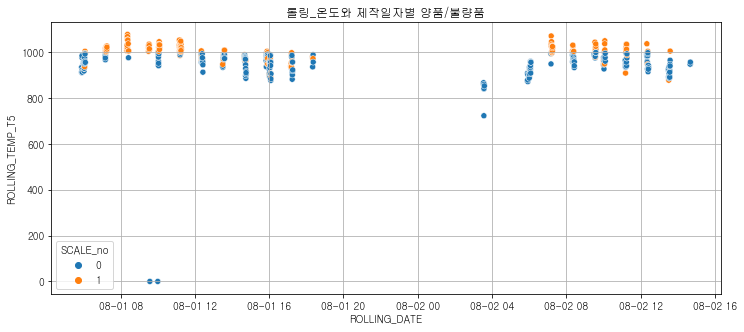

In [26]:
fig, axes = plt.subplots(1,1, figsize=(12,5))

axes.grid(True)

sns.scatterplot(data = df1, x = 'ROLLING_DATE', y = 'ROLLING_TEMP_T5', hue = 'SCALE_no').set(
    title = '롤링_온도와 제작일자별 양품/불량품')

### C0가 주로만들어지는 시간대는 8월1일 기준 오전6~오후

[Text(0.5, 1.0, '롤링_온도와 제작일자별 양품/불량품')]

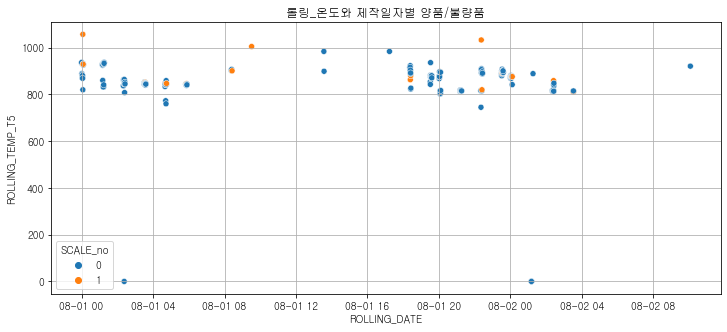

In [27]:
fig, axes = plt.subplots(1,1, figsize=(12,5))

axes.grid(True)

sns.scatterplot(data = df2, x = 'ROLLING_DATE', y = 'ROLLING_TEMP_T5', hue = 'SCALE_no').set(
    title = '롤링_온도와 제작일자별 양품/불량품')

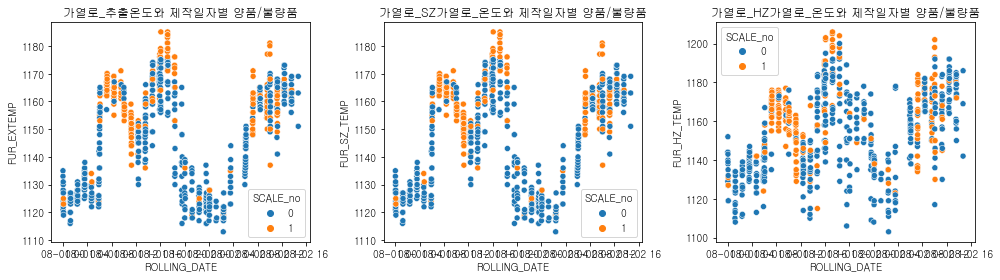

In [28]:
#제작일자별 가열로SZ온도와 가열로HZ온도,가열로_추출온도별로 양품/불량품 생산을 비교해본다.

fig, axes = plt.subplots(1,3, figsize=(14,4))


sns.scatterplot(data = df, x = 'ROLLING_DATE', y = 'FUR_EXTEMP', hue = 'SCALE_no',ax = axes[0]).set(
    title = '가열로_추출온도와 제작일자별 양품/불량품')
sns.scatterplot(data = df, x = 'ROLLING_DATE', y = 'FUR_SZ_TEMP', hue = 'SCALE_no',ax = axes[1]).set(
    title = '가열로_SZ가열로_온도와 제작일자별 양품/불량품')
sns.scatterplot(data = df, x = 'ROLLING_DATE', y = 'FUR_HZ_TEMP', hue = 'SCALE_no',ax = axes[2]).set(
    title = '가열로_HZ가열로_온도와 제작일자별 양품/불량품')


fig.tight_layout()

In [29]:
#가열로SZ온도와 가열로_추출온도 그래프가 동일해보여서 두 column이 동일한 value인지 확인해본다.

print(df['FUR_EXTEMP'].equals(df['FUR_SZ_TEMP']))

#가열로_추출온도와 가열로SZ온도가 동일한값을 가지는걸로 보아 가열로SZ온도를 추출한 걸로 보인다.

#sns.pairplot(df,x_vars=["FUR_HZ_TEMP", "FUR_SZ_TEMP", "FUR_EXTEMP",'ROLLING_TEMP_T5','ROLLING_DESCALING'],
#    y_vars=["FUR_HZ_TIME", "FUR_SZ_TIME",'FUR_TIME'],hue="SCALE_no") 를 사용했을때도 동일한 시각화를 보인다는 걸 확인할 수 있다.

#피어슨 상관계수를 비교해 보았을때도 가열로SZ온도와 가열로_추출온도는 +1로 완전히 동일한 값이다.
corr = df.corr(method='pearson')
print(corr)

True
                     PT_THK   PT_WDTH    PT_LTH    PT_WGT  FUR_NO_ROW  \
PT_THK             1.000000 -0.313151 -0.862618 -0.397391   -0.002530   
PT_WDTH           -0.313151  1.000000  0.119726  0.031009    0.006727   
PT_LTH            -0.862618  0.119726  1.000000  0.451815   -0.021185   
PT_WGT            -0.397391  0.031009  0.451815  1.000000   -0.022241   
FUR_NO_ROW        -0.002530  0.006727 -0.021185 -0.022241    1.000000   
FUR_HZ_TEMP       -0.523926  0.180024  0.473111  0.153331    0.004753   
FUR_HZ_TIME        0.160110 -0.119175 -0.077392  0.010491   -0.015791   
FUR_SZ_TEMP       -0.694770  0.227296  0.645402  0.359513    0.009228   
FUR_SZ_TIME        0.113171  0.022627 -0.070225 -0.190922    0.049045   
FUR_TIME           0.413009 -0.393200 -0.251950 -0.057776    0.016053   
FUR_EXTEMP        -0.694770  0.227296  0.645402  0.359513    0.009228   
ROLLING_TEMP_T5   -0.373976 -0.021807  0.312762  0.263216   -0.004372   
ROLLING_DESCALING -0.836631  0.337540  0.80928

# 지도학습 - 의사결정나무 모델

In [30]:
target= ['HSB', 'SCALE', 'STEEL_KIND','rolling_slot',
              'FUR_NO','FUR_HZ_TEMP','FUR_HZ_TIME','FUR_SZ_TEMP','FUR_SZ_TIME','FUR_TIME','ROLLING_TEMP_T5','ROLLING_DESCALING']

In [31]:
dataset = df[target]
dataset = pd.get_dummies(dataset)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   FUR_HZ_TEMP        720 non-null    int64
 1   FUR_HZ_TIME        720 non-null    int64
 2   FUR_SZ_TEMP        720 non-null    int64
 3   FUR_SZ_TIME        720 non-null    int64
 4   FUR_TIME           720 non-null    int64
 5   ROLLING_TEMP_T5    720 non-null    int64
 6   ROLLING_DESCALING  720 non-null    int64
 7   HSB_미적용            720 non-null    uint8
 8   HSB_적용             720 non-null    uint8
 9   SCALE_불량           720 non-null    uint8
 10  SCALE_양품           720 non-null    uint8
 11  STEEL_KIND_C0      720 non-null    uint8
 12  STEEL_KIND_C1      720 non-null    uint8
 13  STEEL_KIND_C3      720 non-null    uint8
 14  STEEL_KIND_T0      720 non-null    uint8
 15  STEEL_KIND_T1      720 non-null    uint8
 16  STEEL_KIND_T3      720 non-null    uint8
 17  STEEL_KIND_T5   

In [32]:
drop_dataset = dataset.drop(['SCALE_양품', 'STEEL_KIND_C1','STEEL_KIND_C3','STEEL_KIND_T0','STEEL_KIND_T1','STEEL_KIND_T3',
                            'STEEL_KIND_T5','STEEL_KIND_T7']
                            ,axis = 1)
drop_dataset.head(1)

,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING,HSB_미적용,HSB_적용,SCALE_불량,STEEL_KIND_C0,STEEL_KIND_T8,rolling_slot_새벽,rolling_slot_오전,rolling_slot_오후,rolling_slot_저녁,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기
0,1144,116,1133,59,282,934,8,0,1,0,0,0,1,0,0,0,1,0,0


In [33]:
drop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   FUR_HZ_TEMP        720 non-null    int64
 1   FUR_HZ_TIME        720 non-null    int64
 2   FUR_SZ_TEMP        720 non-null    int64
 3   FUR_SZ_TIME        720 non-null    int64
 4   FUR_TIME           720 non-null    int64
 5   ROLLING_TEMP_T5    720 non-null    int64
 6   ROLLING_DESCALING  720 non-null    int64
 7   HSB_미적용            720 non-null    uint8
 8   HSB_적용             720 non-null    uint8
 9   SCALE_불량           720 non-null    uint8
 10  STEEL_KIND_C0      720 non-null    uint8
 11  STEEL_KIND_T8      720 non-null    uint8
 12  rolling_slot_새벽    720 non-null    uint8
 13  rolling_slot_오전    720 non-null    uint8
 14  rolling_slot_오후    720 non-null    uint8
 15  rolling_slot_저녁    720 non-null    uint8
 16  FUR_NO_1호기         720 non-null    uint8
 17  FUR_NO_2호기      

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [35]:
X = drop_dataset.drop(['SCALE_불량'], axis = 1)
Y = drop_dataset['SCALE_불량'].ravel()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [36]:
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [37]:
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 0.9722222222222222
테스트 정확도 : 0.9675925925925926


In [38]:
train_accuracy - test_accuracy

0.00462962962962965

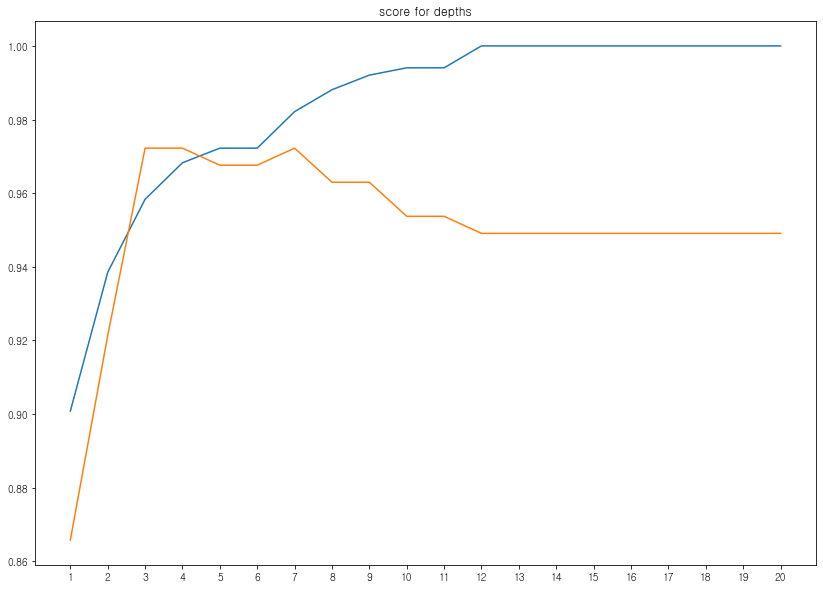

In [39]:
train_score=[]
test_score=[]
for i in range(1,21):
    model=DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [40]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          model.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False)

,feature_names,coefficient
5,ROLLING_TEMP_T5,0.624101
8,HSB_적용,0.135195
6,ROLLING_DESCALING,0.100775
2,FUR_SZ_TEMP,0.077500
4,FUR_TIME,0.036213
15,FUR_NO_1호기,0.007653
1,FUR_HZ_TIME,0.006696
0,FUR_HZ_TEMP,0.006088
3,FUR_SZ_TIME,0.004464
12,rolling_slot_오전,0.001315


In [41]:
importance[importance['특성 중요도']!=0.00].sort_values(by = "특성 중요도",ascending = False)

,feature_names,coefficient
5,ROLLING_TEMP_T5,0.624101
8,HSB_적용,0.135195
6,ROLLING_DESCALING,0.100775
2,FUR_SZ_TEMP,0.077500
4,FUR_TIME,0.036213
15,FUR_NO_1호기,0.007653
1,FUR_HZ_TIME,0.006696
0,FUR_HZ_TEMP,0.006088
3,FUR_SZ_TIME,0.004464
12,rolling_slot_오전,0.001315


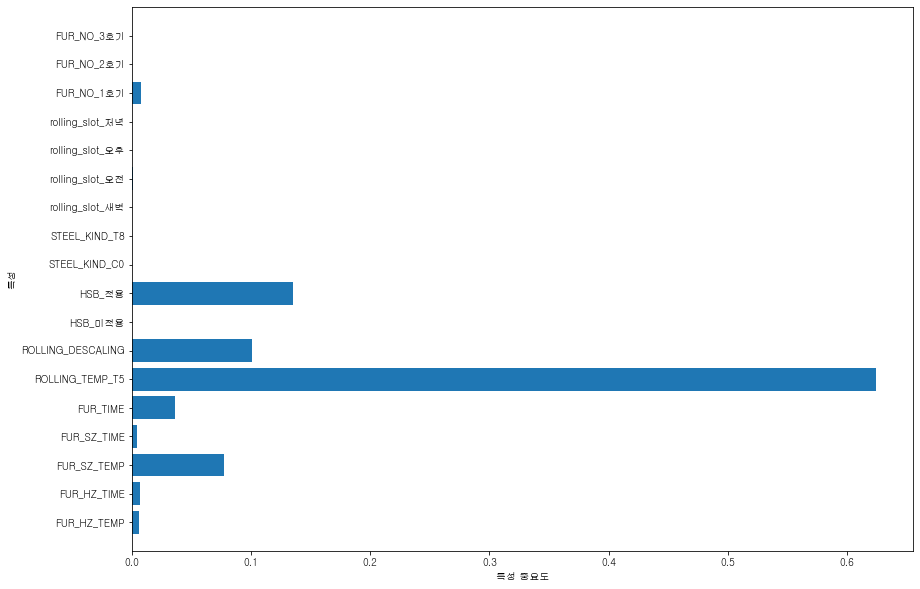

In [42]:
# 각 모델의 특성 중요도 시각화 (내림차순되어있지 않음)
def plot_feature_importances_불량(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_불량(model)

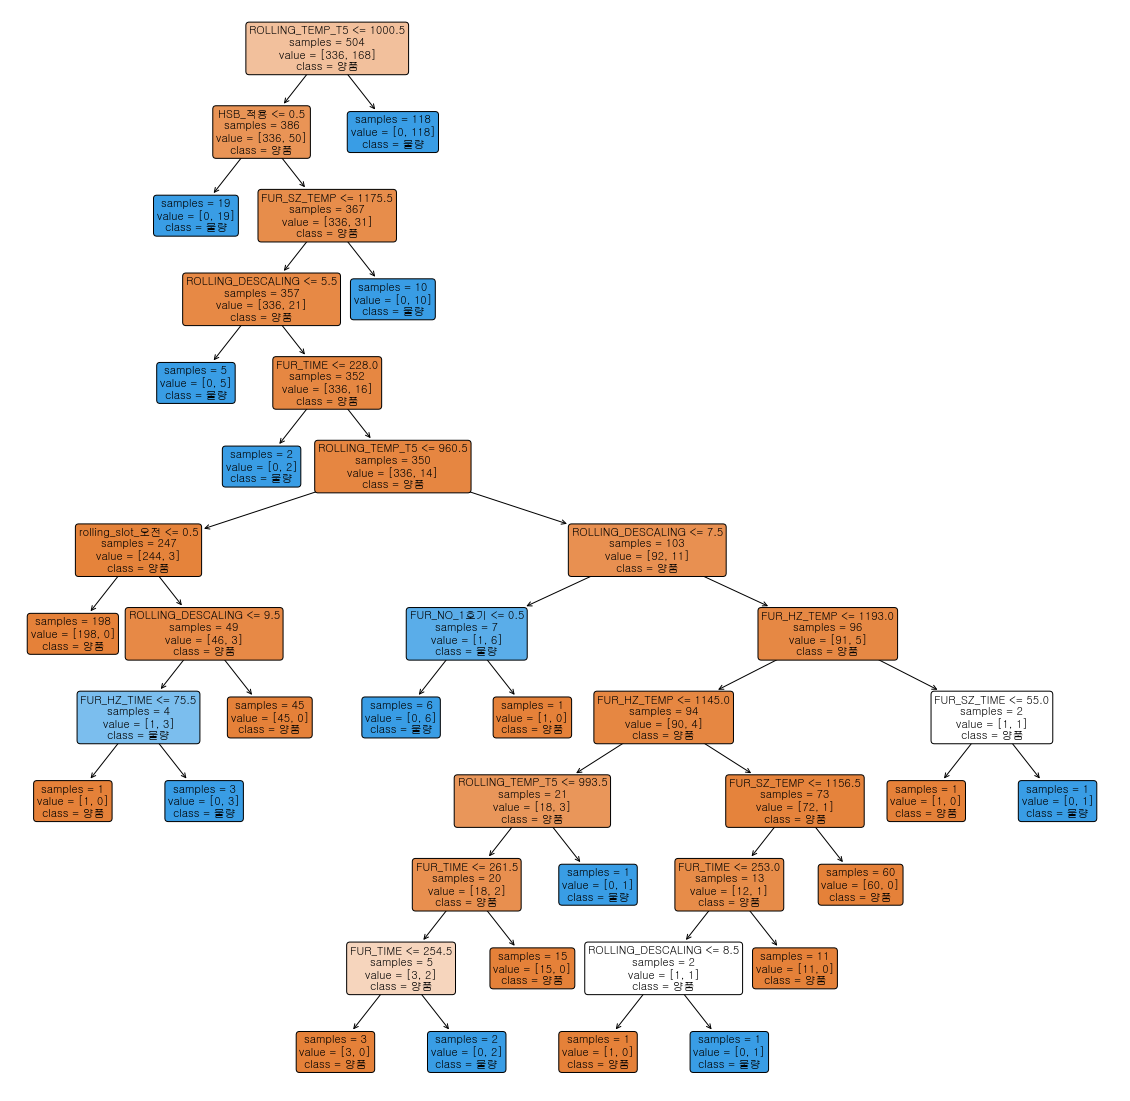

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20,20]

plot_tree(model, class_names=["양품", "불량"], feature_names=X.columns,
         impurity=False, filled=True, rounded=True, fontsize=11)

plt.show()

In [44]:
ROLLING_TEMP_T5 = 950   # 압연_온도
HSB_적용 = 1            #스케일제거장치 적용여부
FUR_SZ_TEMP = 900       #가열로_균열대_온도
ROLLING_DESCALING = 6   #압연 DESCALING 작업횟수
FUR_TIME = 100          #가열로_내부에 있었던 시간
FUR_HZ_TEMP = 0
rolling_slot_오전 = 0
FUR_NO_2호기 = 0
FUR_NO_1호기 = 0
rolling_slot_저녁 = 0
rolling_slot_오후 = 0
STEEL_KIND_C0 = 0
rolling_slot_새벽 = 0
STEEL_KIND_T8 = 0
FUR_HZ_TIME = 0
HSB_미적용 = 0
FUR_SZ_TIME = 0
FUR_NO_3호기 = 0
input_data = [ROLLING_TEMP_T5,HSB_적용,FUR_SZ_TEMP,ROLLING_DESCALING,FUR_TIME,FUR_HZ_TEMP,rolling_slot_오전,FUR_NO_2호기,FUR_NO_1호기,
             rolling_slot_저녁,rolling_slot_오후,STEEL_KIND_C0,rolling_slot_새벽,STEEL_KIND_T8,FUR_HZ_TIME,HSB_미적용,FUR_SZ_TIME,FUR_NO_3호기]

In [45]:
print(model.predict([input_data]))        #불량 예측
print(model.predict_proba([input_data]))  # 1.0 확률로

[1]
[[0. 1.]]


C:\Users\lks40\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\lks40\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [46]:
pred_dt = model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, pred_dt)
print(conf_matrix)

[[145   8]
 [  3  60]]


In [48]:
from sklearn.metrics import classification_report
class_report = classification_report(Y_test, pred_dt)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       153
           1       0.88      0.95      0.92        63

    accuracy                           0.95       216
   macro avg       0.93      0.95      0.94       216
weighted avg       0.95      0.95      0.95       216



# 랜덤포레스트와 그레디언트 부스팅 모델

### 랜덤포레스트

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X = drop_dataset.drop(['SCALE_불량'], axis = 1)
Y = drop_dataset['SCALE_불량'].ravel()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [50]:
scaler = StandardScaler()
scaler.fit(X_train)

x_train_std = scaler.transform(X_train)
x_test_std = scaler.transform(X_test)

In [51]:
rf_clf = RandomForestClassifier(max_depth = 4, n_estimators=150)

rf_clf.fit(x_train_std, Y_train)

RandomForestClassifier(max_depth=4, n_estimators=150)

In [52]:
rf_train_score = rf_clf.score(x_train_std, Y_train)
rf_test_score = rf_clf.score(x_test_std, Y_test)
print(f'랜덤포레스트 훈련 정확도는 {round(rf_train_score,3)} 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {round(rf_test_score,3)} 입니다.')

랜덤포레스트 훈련 정확도는 0.952 입니다.
랜덤포레스트 테스트 정확도는 0.949 입니다.


In [53]:
round(rf_train_score,3) - round(rf_test_score,3)

0.0030000000000000027

In [88]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          rf_clf.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False)

,feature_names,특성 중요도
5,ROLLING_TEMP_T5,0.415943
6,ROLLING_DESCALING,0.100071
2,FUR_SZ_TEMP,0.089823
12,rolling_slot_오전,0.058735
7,HSB_미적용,0.056277
8,HSB_적용,0.053543
4,FUR_TIME,0.050328
0,FUR_HZ_TEMP,0.049062
3,FUR_SZ_TIME,0.040364
1,FUR_HZ_TIME,0.036640


In [90]:
importance[importance['특성 중요도']!=0.00000].sort_values(by = "특성 중요도",ascending = False)

,feature_names,특성 중요도
5,ROLLING_TEMP_T5,0.415943
6,ROLLING_DESCALING,0.100071
2,FUR_SZ_TEMP,0.089823
12,rolling_slot_오전,0.058735
7,HSB_미적용,0.056277
8,HSB_적용,0.053543
4,FUR_TIME,0.050328
0,FUR_HZ_TEMP,0.049062
3,FUR_SZ_TIME,0.040364
1,FUR_HZ_TIME,0.036640


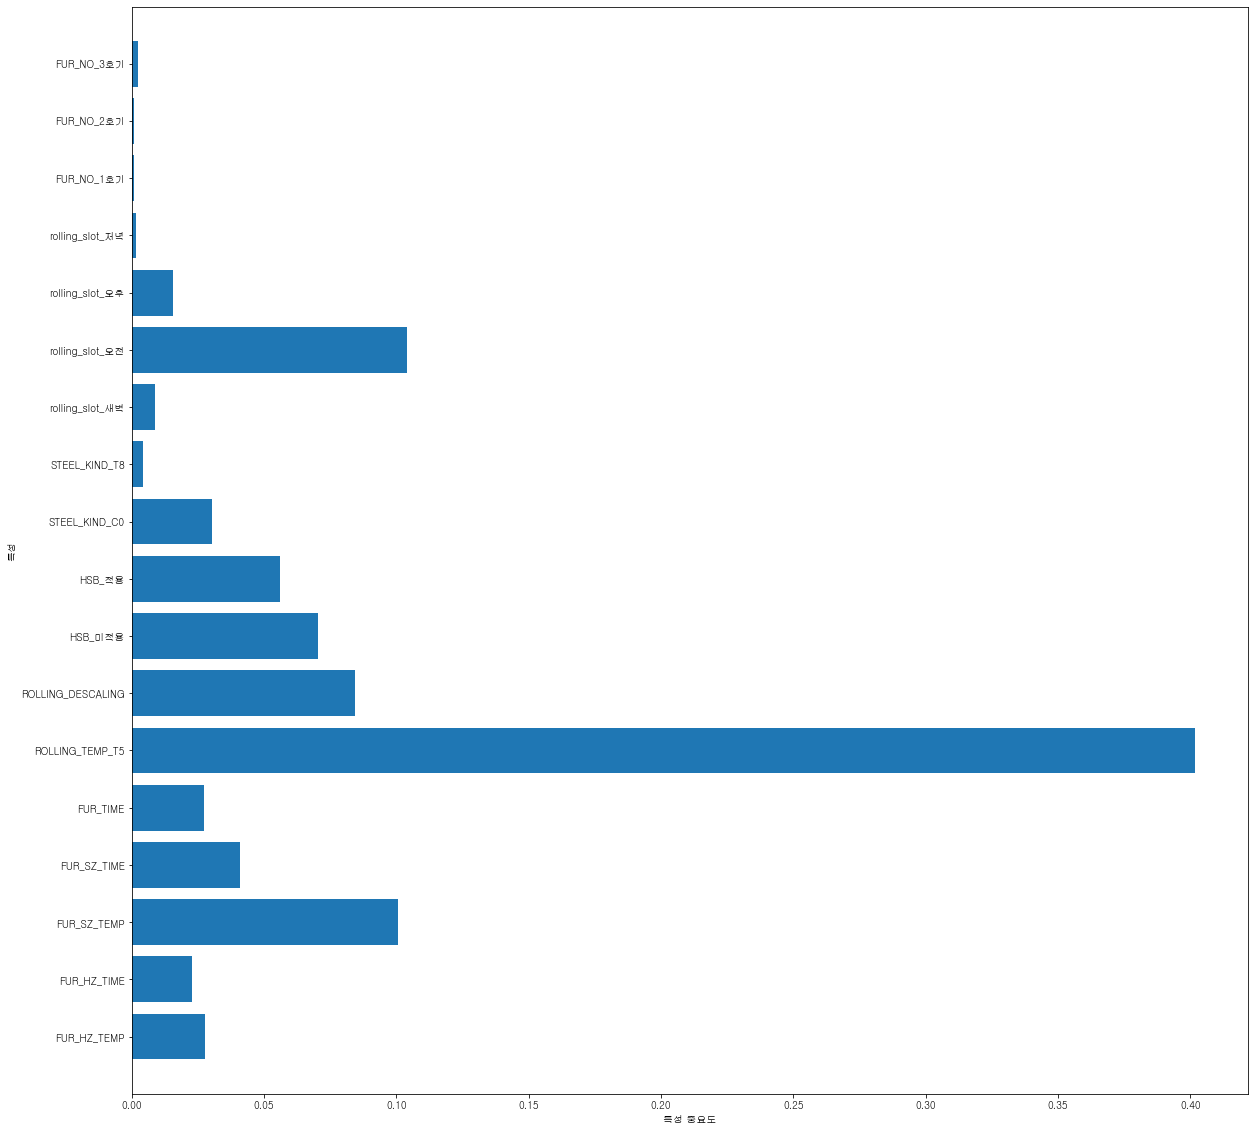

In [56]:
def plot_feature_importances_불량(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_불량(rf_clf)

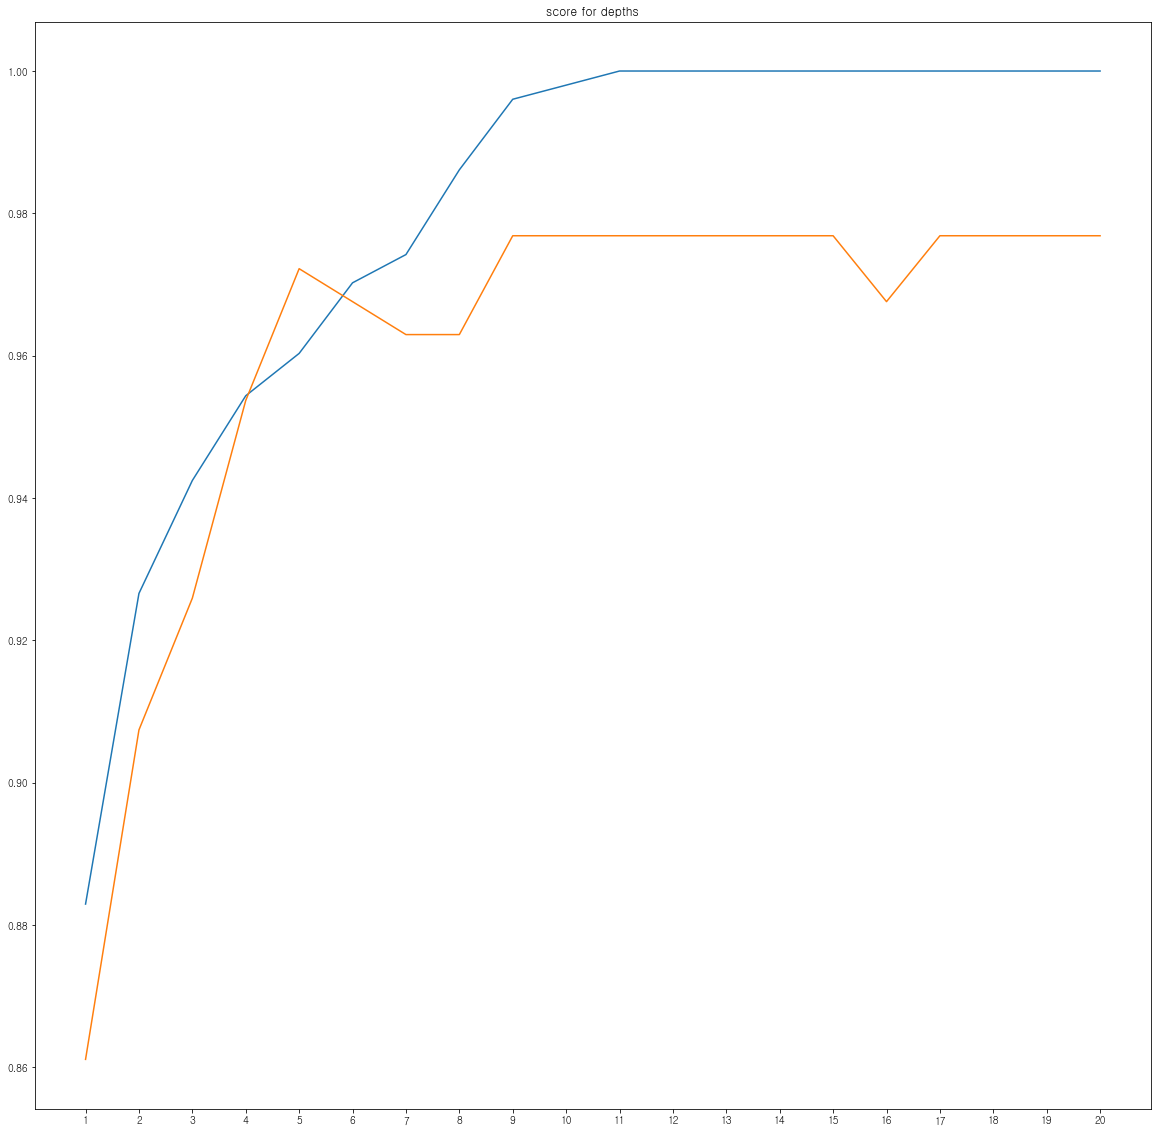

In [57]:
train_score=[]
test_score=[]
for i in range(1,21):
    rf_clf = RandomForestClassifier(max_depth = i, n_estimators=150)
    rf_clf.fit(x_train_std, Y_train)
    train_score.append(rf_clf.score(x_train_std, Y_train))
    test_score.append(rf_clf.score(x_test_std, Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [58]:
pred_rf = rf_clf.predict(x_test_std)

In [59]:
conf_matrix = confusion_matrix(Y_test, pred_rf)
print(conf_matrix)

[[153   0]
 [  5  58]]


In [60]:
class_report = classification_report(Y_test, pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       153
           1       1.00      0.92      0.96        63

    accuracy                           0.98       216
   macro avg       0.98      0.96      0.97       216
weighted avg       0.98      0.98      0.98       216



### 그레디언트 부스팅

In [85]:
from sklearn.ensemble import GradientBoostingClassifier


gbrt = GradientBoostingClassifier(max_depth = 3, learning_rate = 0.1)
gbrt.fit(x_train_std, Y_train)

GradientBoostingClassifier()

In [87]:
gbrt_train_score = gbrt.score(x_train_std, Y_train)
gbrt_test_score = gbrt.score(x_test_std, Y_test)
print(f'그레디언트부스팅 훈련 정확도는 {round(gbrt_train_score,3)} 입니다.')
print(f'그레디언트부스팅 테스트 정확도는 {round(gbrt_test_score,3)} 입니다.')

그레디언트부스팅 훈련 정확도는 1.0 입니다.
그레디언트부스팅 테스트 정확도는 0.995 입니다.


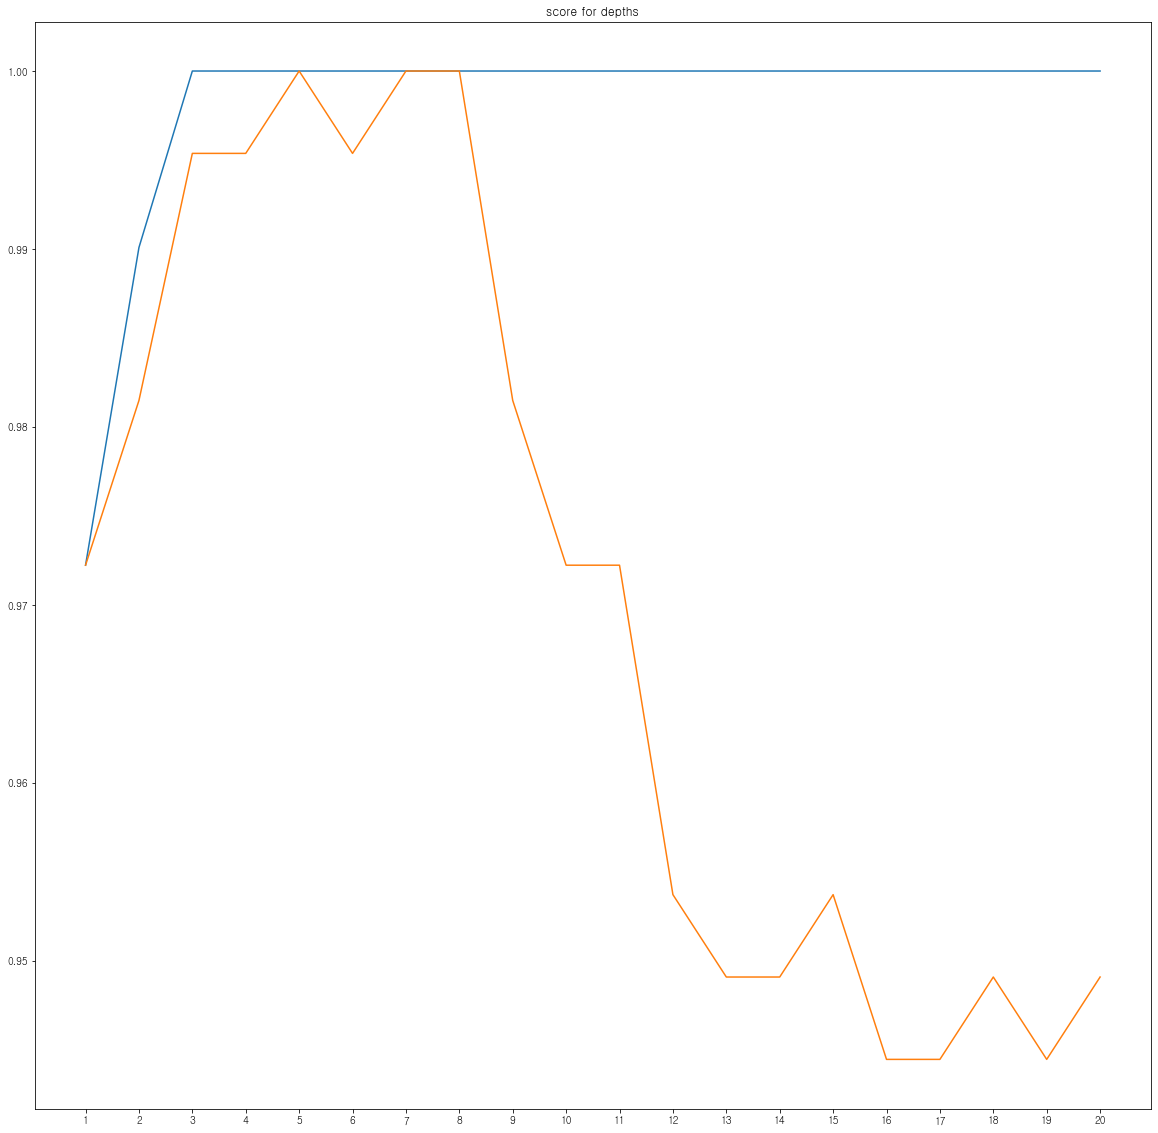

In [83]:
train_score=[]
test_score=[]
for i in range(1,21):
    gbrt = GradientBoostingClassifier(max_depth = i, learning_rate = 0.1)
    gbrt.fit(x_train_std, Y_train)
    train_score.append(gbrt.score(x_train_std, Y_train))
    test_score.append(gbrt.score(x_test_std, Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [84]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":gbrt.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False)

,feature_names,coefficient
5,ROLLING_TEMP_T5,6.223535e-01
6,ROLLING_DESCALING,9.967776e-02
2,FUR_SZ_TEMP,8.371655e-02
7,HSB_미적용,7.092905e-02
8,HSB_적용,6.426599e-02
4,FUR_TIME,3.110677e-02
0,FUR_HZ_TEMP,1.538515e-02
1,FUR_HZ_TIME,5.742112e-03
3,FUR_SZ_TIME,2.768651e-03
15,FUR_NO_1호기,1.903582e-03


In [76]:
importance[importance['특성 중요도']!=0.00].sort_values(by = "특성 중요도",ascending = False)

,feature_names,coefficient
5,ROLLING_TEMP_T5,6.219355e-01
6,ROLLING_DESCALING,9.992974e-02
2,FUR_SZ_TEMP,8.351821e-02
7,HSB_미적용,7.012470e-02
8,HSB_적용,6.507035e-02
4,FUR_TIME,3.576379e-02
0,FUR_HZ_TEMP,1.128195e-02
1,FUR_HZ_TIME,6.030013e-03
15,FUR_NO_1호기,2.457301e-03
3,FUR_SZ_TIME,1.886179e-03


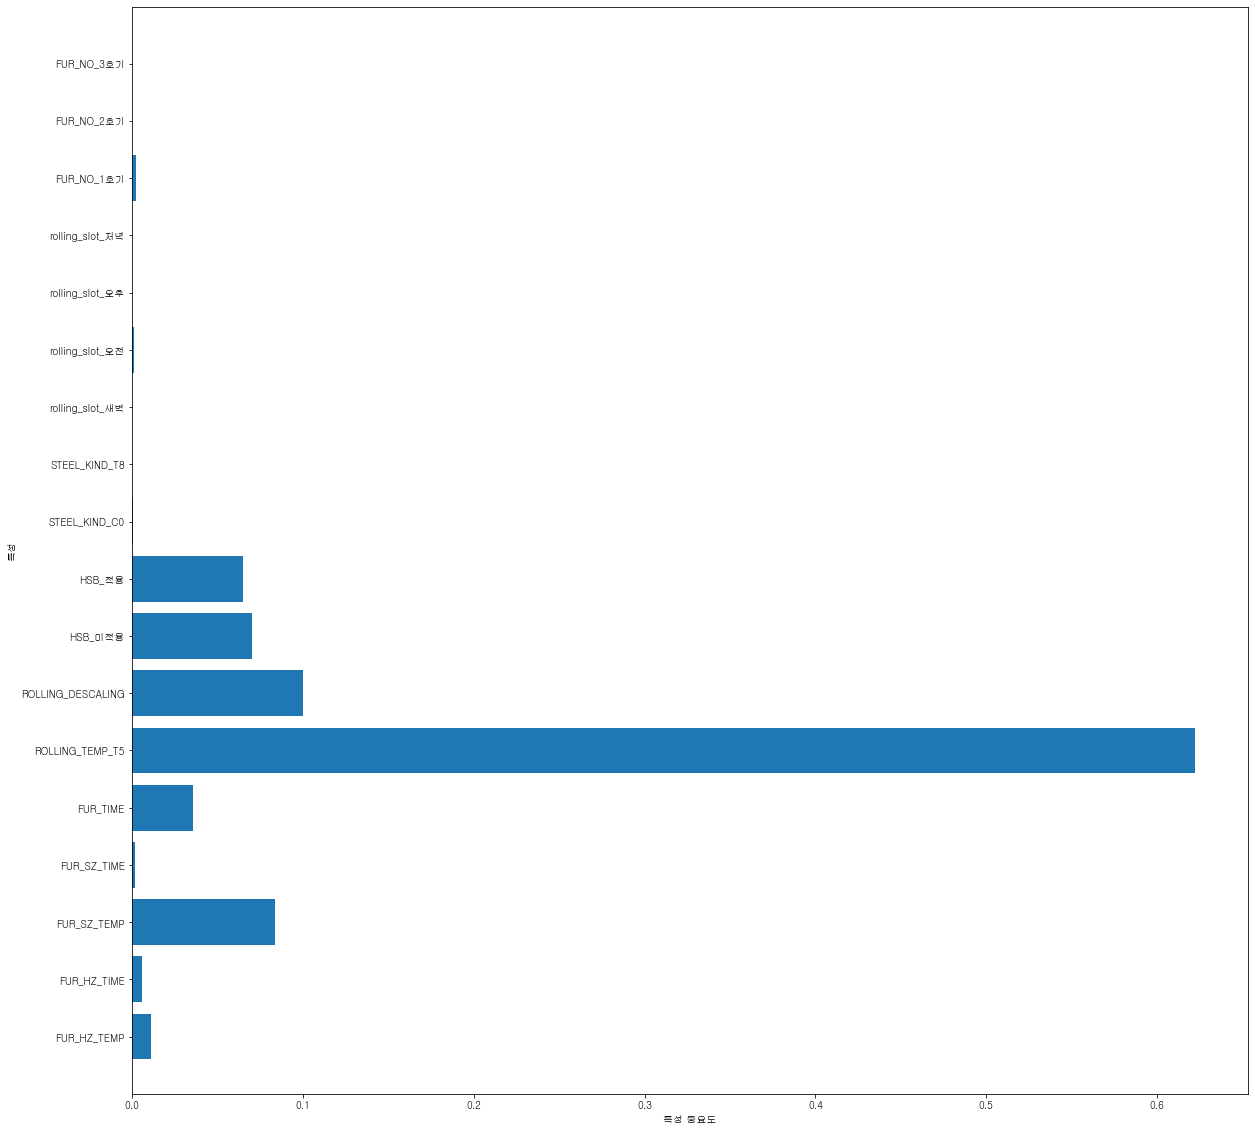

In [77]:
def plot_feature_importances_불량(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_불량(gbrt)

In [78]:
pred_gb = gbrt.predict(x_test_std)

In [79]:
conf_matrix = confusion_matrix(Y_test, pred_gb)
print(conf_matrix)

[[146   7]
 [  4  59]]


In [80]:
class_report = classification_report(Y_test, pred_gb)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       153
           1       0.89      0.94      0.91        63

    accuracy                           0.95       216
   macro avg       0.93      0.95      0.94       216
weighted avg       0.95      0.95      0.95       216

